In [60]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [61]:
df=pd.read_csv('fake_reg.csv') # based on regression problem
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


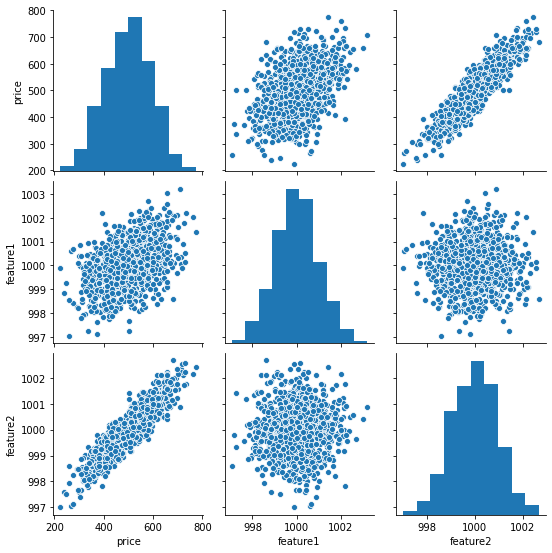

In [62]:
sb.pairplot(df)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X=df[['feature1','feature2']].values

In [65]:
y=df['price'].values

In [66]:
X # numpy array

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
X_train.shape

(700, 2)

In [69]:
X_test.shape

(300, 2)

In [70]:
y_train.shape

(700,)

In [71]:
from sklearn.preprocessing import MinMaxScaler # for Scaling the Data based on Standard Deviation

In [72]:
# help(MinMaxScalar) to get more info

In [73]:
scaler=MinMaxScaler()

In [74]:
scaler.fit(X_train) # calculates the parameters needed to perform scaling

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
X_train=scaler.transform(X_train)# to transform 

In [76]:
X_test=scaler.transform(X_test)

In [77]:
X_train # gets scaled

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [78]:
X_train.max()

1.0

In [79]:
X_train.min()

0.0

In [80]:
### Creating a NEURAL NETWORK

In [81]:
  from tensorflow.keras.models import Sequential

In [82]:
from tensorflow.keras.layers import Dense

In [83]:
help(Sequential) # shows parameters needed within

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model does

In [84]:
#help(Dense)

In [85]:
model=Sequential([Dense(4,activation='relu'),# 4 neurons densly connected
                  Dense(2,activation='relu'),# 2 neurons densly connected
                  Dense(1)]) 

In [86]:
### This is default method & convinient by creating empty sequential model and adding layers inside it
### In this model we will create 3 layers with 4 neurons each and a single output layer


In [87]:
model=Sequential() 
model.add(Dense(4,activation='relu')) 
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1)) # this is output node

model.compile(optimizer='rmsprop',loss='mse') # mse=mean squared error

In [88]:
model.fit(X_train,y_train,epochs=250) # epochs is number of times our model has gone through training set 

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256441.2344
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256201.9219
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255950.3594
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255670.0312
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255360.5312
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255022.1250
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 254656.3438
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254265.3750
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 253842.3594
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 253381.9844
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 252888.7500
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [89]:
model.history.history

{'loss': [256441.234375,
  256201.921875,
  255950.359375,
  255670.03125,
  255360.53125,
  255022.125,
  254656.34375,
  254265.375,
  253842.359375,
  253381.984375,
  252888.75,
  252355.203125,
  251779.765625,
  251163.015625,
  250505.421875,
  249802.015625,
  249055.984375,
  248266.75,
  247433.640625,
  246545.71875,
  245602.21875,
  244604.6875,
  243549.0,
  242422.3125,
  241237.171875,
  239990.8125,
  238665.828125,
  237280.953125,
  235822.234375,
  234286.078125,
  232672.65625,
  230986.484375,
  229214.609375,
  227358.625,
  225428.4375,
  223411.21875,
  221300.09375,
  219102.421875,
  216818.421875,
  214446.359375,
  211977.46875,
  209422.828125,
  206776.734375,
  204020.78125,
  201182.21875,
  198251.796875,
  195216.40625,
  192080.9375,
  188849.484375,
  185523.078125,
  182091.21875,
  178564.953125,
  174963.5,
  171253.21875,
  167436.65625,
  163544.859375,
  159553.421875,
  155488.5,
  151309.015625,
  147078.40625,
  142771.796875,
  138369.2031

In [90]:
loss_df=pd.DataFrame(model.history.history)

In [91]:
loss_df

,loss
0,256441.234375
1,256201.921875
2,255950.359375
3,255670.031250
4,255360.531250
...,...
245,24.157534
246,24.383030
247,24.113434
248,24.340626


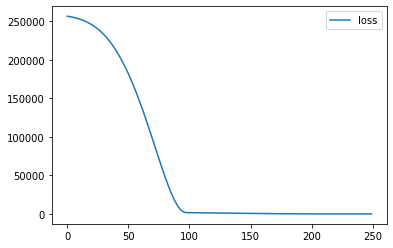

In [92]:
loss_df.plot()

In [93]:
model.evaluate(X_test,y_test,verbose=0) # gives model's loss on testing set i.e mse

25.090576171875

In [94]:
model.evaluate(X_train,y_train,verbose=0) # gives model's loss on training set

23.749065399169922

In [95]:
test_predictions=model.predict(X_test)

In [96]:
test_predictions

array([[405.5176 ],
       [623.7698 ],
       [592.3327 ],
       [572.52216],
       [366.97058],
       [579.4281 ],
       [515.40485],
       [459.28656],
       [549.5386 ],
       [447.68854],
       [612.01294],
       [549.04987],
       [419.3376 ],
       [409.12732],
       [651.34064],
       [437.492  ],
       [508.57666],
       [660.2706 ],
       [662.86084],
       [565.7169 ],
       [334.5198 ],
       [445.07013],
       [382.80215],
       [378.97708],
       [566.8339 ],
       [610.8888 ],
       [532.6391 ],
       [428.0767 ],
       [655.75006],
       [414.2601 ],
       [442.816  ],
       [485.3565 ],
       [438.63336],
       [682.13696],
       [424.90363],
       [417.96796],
       [502.02145],
       [550.6947 ],
       [510.0604 ],
       [395.70538],
       [618.794  ],
       [416.81976],
       [604.65674],
       [446.09903],
       [502.2208 ],
       [581.8085 ],
       [669.1307 ],
       [490.5828 ],
       [318.74878],
       [485.6685 ],


In [97]:
test_predictions=pd.Series(test_predictions.reshape(300,))

In [98]:
test_predictions

0      405.517609
1      623.769775
2      592.332703
3      572.522156
4      366.970581
          ...    
295    529.330750
296    515.767151
297    609.867371
298    417.123535
299    411.152222
Length: 300, dtype: float32

In [99]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [100]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [101]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [102]:
pred_df

,Test True Y,0
0,402.296319,405.517609
1,624.156198,623.769775
2,582.455066,592.332703
3,578.588606,572.522156
4,371.224104,366.970581
...,...,...
295,525.704657,529.330750
296,502.909473,515.767151
297,612.727910,609.867371
298,417.569725,417.123535


In [112]:
pred_df.columns=['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,402.296319,405.517609
1,624.156198,623.769775
2,582.455066,592.332703
3,578.588606,572.522156
4,371.224104,366.970581
...,...,...
295,525.704657,529.330750
296,502.909473,515.767151
297,612.727910,609.867371
298,417.569725,417.123535


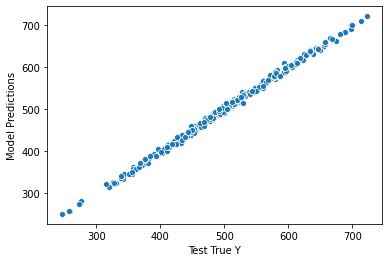

In [116]:
sb.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [117]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [120]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions']) # the model is very good

4.0178412203035

In [121]:
#df.describe()

In [123]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']) # its similar to model.evaluate 

25.09057857288986

In [124]:
new_gem=[[998,1000]]

In [125]:
new_gem=scaler.transform(new_gem)


In [126]:
model.predict(new_gem)

array([[420.03235]], dtype=float32)

In [127]:
from tensorflow.keras.models import load_model

In [128]:
model.save('my_gem_model.h5')